# Cartesian Graphs With Matplotlib

Sometimes it is useful to display plots with the axes centered around the origin. While this is doable in Matplotlib, there are no helper functions or methods that I know of to simplify things. Here's an attempt to make life easier in these situations by providign a function that helps format plots on a graph centered at the origin.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# displaying a cartesian plane centered about the origin
# for gridlines, see http://www.scipy-lectures.org/intro/matplotlib/auto_examples/plot_grid_ex.html
# for spine placement, see http://matplotlib.org/examples/pylab_examples/spine_placement_demo.html
# for an opinion on function arguments, see http://docs.python-guide.org/en/latest/writing/style/#function-arguments

def format_func(value, tick_number):
    # code adapted from:
    # https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.10-Customizing-Ticks.ipynb
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == -1:
        return r"$-\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N == -2:
        return r"$-\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

def cartesian_plot(xlim=(-1, 1), ylim=(-1, 1), pimarks=False):
    """Create a plot centered at the origin
    
    Parameters
    ----------
    xlim : tuple of minimum and maximum x-axis bounds
    ylim : tuple of minimum and maximum y-axis bounds
    pimarks : boolean. If True, display pi values on x-axis
    
    Returns
    -------
    ax : matplotlib axis object
    """
    ax = plt.axes([0, 0, 1, 1])
    ax.set_aspect(1/1)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    
    xmajor_mult = ymajor_mult = 1
    xminor_mult = yminor_mult = 0.5
    xdiff = xlim[1] - xlim[0]
    ydiff = ylim[1] - ylim[0]
    if (pimarks):
        ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
        ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
        

        ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    elif (xdiff <= 10):
        ax.xaxis.set_major_locator(plt.MultipleLocator(xmajor_mult))
        ax.xaxis.set_minor_locator(plt.MultipleLocator(xminor_mult))
    else :
        xmajor_mult = round(xdiff/10)
        ax.xaxis.set_major_locator(plt.MultipleLocator(xmajor_mult))
    if (ydiff <= 10):
        ax.yaxis.set_major_locator(plt.MultipleLocator(ymajor_mult))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(yminor_mult))
    else :
        ymajor_mult = round(ydiff/10)
        ax.yaxis.set_major_locator(plt.MultipleLocator(ymajor_mult))
    ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
    ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
    ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
    ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    # ax.spines['left'].set_smart_bounds(True)
    # ax.spines['bottom'].set_smart_bounds(True)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    return ax

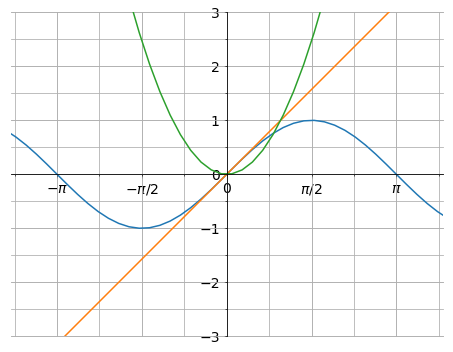

In [4]:
fig = plt.figure(figsize=(6, 6))

ax = cartesian_plot(xlim=(-4, 4), ylim=(-3, 3), pimarks=True)
x = np.linspace(-3*np.pi, 3*np.pi, 100)
y = np.sin(x)
ax.plot(x, y)
ax.plot(x, x)
ax.plot(x, x**2)
